In [ ]:
import pandas as pd
import numpy as np
import warnings
import os
warnings.filterwarnings(action="ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
#tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D, Dense, Dropout,Flatten, Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping 

In [2]:
for dirname, _, filenames in os.walk('BrainTumorDataSet/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

BrainTumorDataSet/BrainTumor/Cancer (955).jpg
BrainTumorDataSet/BrainTumor/Cancer (903).jpg
BrainTumorDataSet/BrainTumor/Cancer (1151).jpg
BrainTumorDataSet/BrainTumor/Cancer (1744).jpg
BrainTumorDataSet/BrainTumor/Cancer (1198).jpg
BrainTumorDataSet/BrainTumor/Cancer (206).jpg
BrainTumorDataSet/BrainTumor/Cancer (1540).jpg
BrainTumorDataSet/BrainTumor/Cancer (501).jpg
BrainTumorDataSet/BrainTumor/Cancer (1165).jpg
BrainTumorDataSet/BrainTumor/Cancer (898).jpg
BrainTumorDataSet/BrainTumor/Cancer (678).jpg
BrainTumorDataSet/BrainTumor/Cancer (2287).jpg
BrainTumorDataSet/BrainTumor/Cancer (2329).jpg
BrainTumorDataSet/BrainTumor/Cancer (2400).jpg
BrainTumorDataSet/BrainTumor/Cancer (257).jpg
BrainTumorDataSet/BrainTumor/Cancer (532).jpg
BrainTumorDataSet/BrainTumor/Cancer (2341).jpg
BrainTumorDataSet/BrainTumor/Cancer (1179).jpg
BrainTumorDataSet/BrainTumor/Cancer (750).jpg
BrainTumorDataSet/BrainTumor/Cancer (2018).jpg
BrainTumorDataSet/BrainTumor/Cancer (14).tif
BrainTumorDataSet/BrainT

BrainTumorDataSet/Healthy/Not Cancer  (1402).jpg
BrainTumorDataSet/Healthy/Not Cancer  (2018).jpg
BrainTumorDataSet/Healthy/Not Cancer  (31).jpg
BrainTumorDataSet/Healthy/Not Cancer  (1512).jpg
BrainTumorDataSet/Healthy/Not Cancer  (1163).jpg
BrainTumorDataSet/Healthy/Not Cancer  (1045).jpg
BrainTumorDataSet/Healthy/Not Cancer  (911).jpg
BrainTumorDataSet/Healthy/Not Cancer  (1425).jpg
BrainTumorDataSet/Healthy/Not Cancer  (1779).jpg
BrainTumorDataSet/Healthy/Not Cancer  (1016).jpg
BrainTumorDataSet/Healthy/Not Cancer  (798).jpg
BrainTumorDataSet/Healthy/Not Cancer  (1023).jpg
BrainTumorDataSet/Healthy/Not Cancer  (178).jpg
BrainTumorDataSet/Healthy/Not Cancer  (1005).jpg
BrainTumorDataSet/Healthy/Not Cancer  (444).jpg
BrainTumorDataSet/Healthy/Not Cancer  (1007).jpg
BrainTumorDataSet/Healthy/Not Cancer  (1210).jpg
BrainTumorDataSet/Healthy/Not Cancer  (1803).jpg
BrainTumorDataSet/Healthy/Not Cancer  (1748).jpg
BrainTumorDataSet/Healthy/Not Cancer  (839).jpg
BrainTumorDataSet/Healthy/N

In [3]:
tumor_path = r'BrainTumorDataSet/BrainTumor'
healthy_path = r'BrainTumorDataSet/Healthy'
file_paths = []
labels =[]
dir_list = [tumor_path, healthy_path]

In [4]:
for i, j in enumerate(dir_list):
    files = os.listdir(j)
    for f in files:
        file_path = os.path.join(j,f)
        file_paths.append(file_path)
        if i==0:
            labels.append('tumor')
        else:
            labels.append('healthy')

In [14]:
files_series = pd.Series(file_paths, name="file_paths")
label_series = pd.Series(labels, name="labels")
tumor_data = pd.concat([files_series, label_series], axis=1)
tumor_df = pd.DataFrame(tumor_data)

In [15]:
print(tumor_df.head(10))

                                       file_paths labels
0   BrainTumorDataSet/BrainTumor/Cancer (955).jpg  tumor
1   BrainTumorDataSet/BrainTumor/Cancer (903).jpg  tumor
2  BrainTumorDataSet/BrainTumor/Cancer (1151).jpg  tumor
3  BrainTumorDataSet/BrainTumor/Cancer (1744).jpg  tumor
4  BrainTumorDataSet/BrainTumor/Cancer (1198).jpg  tumor
5   BrainTumorDataSet/BrainTumor/Cancer (206).jpg  tumor
6  BrainTumorDataSet/BrainTumor/Cancer (1540).jpg  tumor
7   BrainTumorDataSet/BrainTumor/Cancer (501).jpg  tumor
8  BrainTumorDataSet/BrainTumor/Cancer (1165).jpg  tumor
9   BrainTumorDataSet/BrainTumor/Cancer (898).jpg  tumor


In [16]:
print(tumor_df["labels"].value_counts())

tumor      2513
healthy    2087
Name: labels, dtype: int64


In [17]:
tumor_df.shape

(4600, 2)

In [18]:
#splitting data
train_images, test_images = train_test_split(tumor_df, test_size=0.3, random_state=42)

In [19]:
train_set, val_set = train_test_split(tumor_df, test_size=0.2, random_state=42)

In [20]:
print(train_set.shape)
print(test_images.shape)
print(val_set.shape)
print(train_images.shape)

(3680, 2)
(1380, 2)
(920, 2)
(3220, 2)


In [21]:
image_gen = ImageDataGenerator(preprocessing_function= tf.keras.applications.mobilenet_v2.preprocess_input)
train = image_gen.flow_from_dataframe(dataframe= train_set,x_col="file_paths",y_col="labels",
                                      target_size=(244,244),
                                      color_mode='rgb',
                                      class_mode="categorical", 
                                      batch_size=32,
                                      shuffle=False
                                     )
test = image_gen.flow_from_dataframe(dataframe= test_images,x_col="file_paths", y_col="labels",
                                     target_size=(244,244),
                                     color_mode='rgb',
                                     class_mode="categorical",
                                     batch_size=32,
                                     shuffle= False
                                    )
val = image_gen.flow_from_dataframe(dataframe= val_set,x_col="file_paths", y_col="labels",
                                    target_size=(244,244),
                                    color_mode= 'rgb',
                                    class_mode="categorical",
                                    batch_size=32,
                                    shuffle=False
                                   )

Found 3680 validated image filenames belonging to 2 classes.
Found 1380 validated image filenames belonging to 2 classes.
Found 920 validated image filenames belonging to 2 classes.


In [22]:
classes=list(train.class_indices.keys())
print (classes)

['healthy', 'tumor']


In [23]:
def show_brain_images(image_gen):
    test_dict = test.class_indices
    classes = list(test_dict.keys())
    images, labels=next(image_gen) # get a sample batch from the generator 
    plt.figure(figsize=(20,20))
    length = len(labels)
    if length<25:
        r=length
    else:
        r=25
    for i in range(r):
        plt.subplot(6,6,i+1)
        image=(images[i]+1)/2 #scale images between 0 and 1
        plt.imshow(image)
        index=np.argmax(labels[i])
        class_name=classes[index]
        plt.title(class_name, color="green",fontsize=16)
        plt.axis('off')
    plt.show()

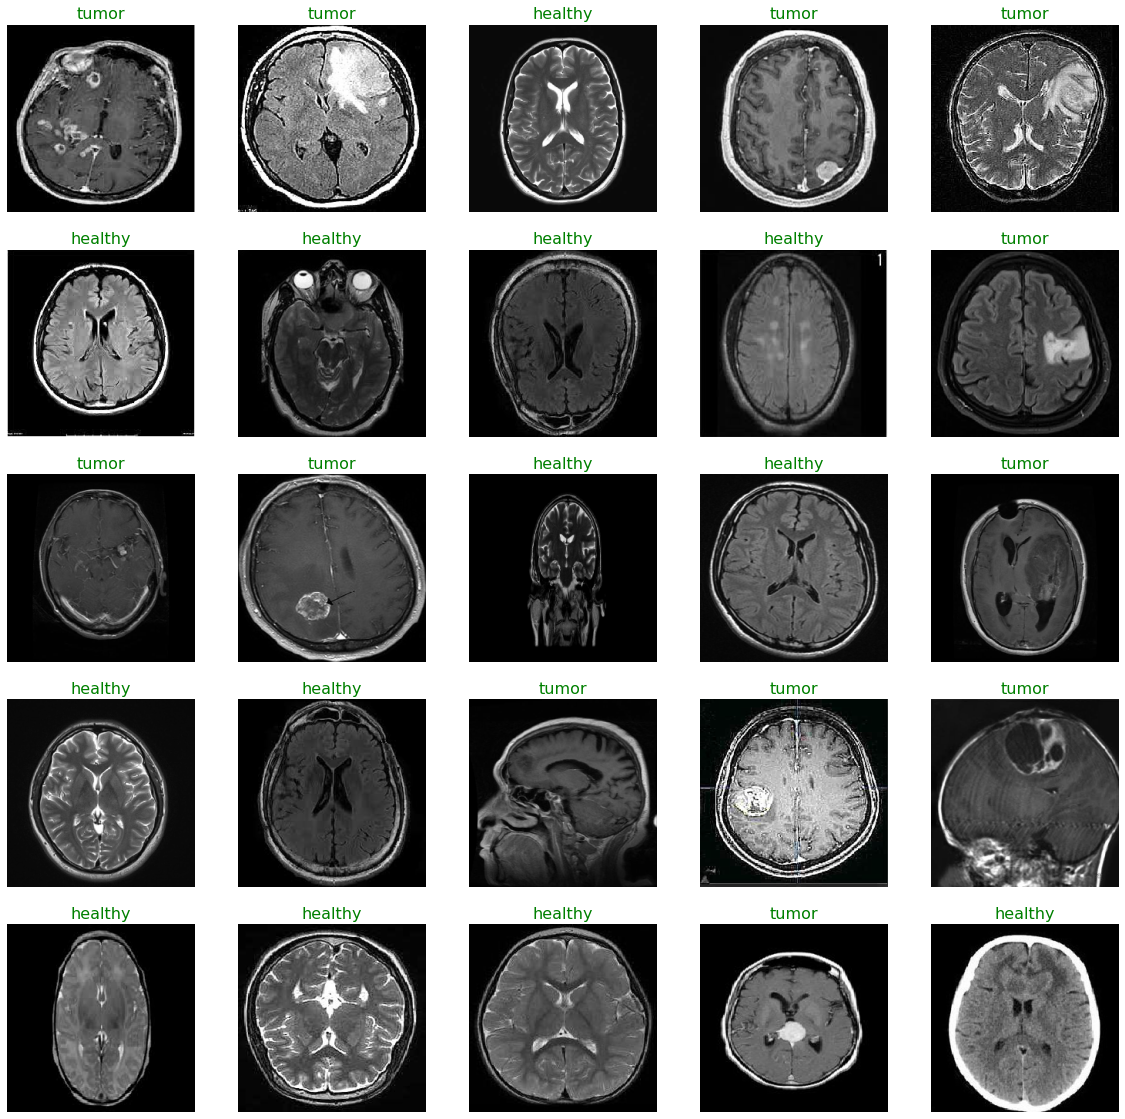

In [24]:
show_brain_images(train)

#### Model sequential

In [25]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(1,1), activation="relu", padding="valid",
               input_shape=(244,244,3)))
model.add(MaxPooling2D(strides=2))
model.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(MaxPooling2D(strides=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(2, activation='softmax'))


model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 242, 242, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 121, 121, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 117, 117, 48)      38448     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 58, 58, 48)        0         
_________________________________________________________________
flatten (Flatten)            (None, 161472)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               41337088  
_________________________________________________________________
dense_1 (Dense)              (None, 84)                2

2022-02-15 12:33:11.206270: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-02-15 12:33:11.206293: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-15 12:33:11.206309: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (hpkk): /proc/driver/nvidia/version does not exist
2022-02-15 12:33:11.206561: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-15 12:33:11.245548: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 165347328 exce

In [28]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

### Fitting model

In [29]:
import time

start = time.time()
History = model.fit(train,validation_data= val, epochs=10,verbose=1)
print("Total time: ", time.time() - start, "seconds")

2022-02-15 12:34:05.457877: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-02-15 12:34:05.568429: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 165347328 exceeds 10% of free system memory.
2022-02-15 12:34:05.579843: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 165347328 exceeds 10% of free system memory.


Epoch 1/10
115/115 [==============================] - 165s 1s/step - loss: 1.0581 - accuracy: 0.5408 - val_loss: 0.6858 - val_accuracy: 0.5663
Epoch 2/10
115/115 [==============================] - 159s 1s/step - loss: 0.6888 - accuracy: 0.5437 - val_loss: 0.6221 - val_accuracy: 0.7065
Epoch 3/10
115/115 [==============================] - 163s 1s/step - loss: 0.4271 - accuracy: 0.8101 - val_loss: 0.2833 - val_accuracy: 0.8674
Epoch 4/10
115/115 [==============================] - 169s 1s/step - loss: 0.1269 - accuracy: 0.9554 - val_loss: 0.1919 - val_accuracy: 0.9293
Epoch 5/10
115/115 [==============================] - 176s 2s/step - loss: 0.0285 - accuracy: 0.9899 - val_loss: 0.1988 - val_accuracy: 0.9478
Epoch 6/10
115/115 [==============================] - 168s 1s/step - loss: 0.0055 - accuracy: 0.9984 - val_loss: 0.2143 - val_accuracy: 0.9576
Epoch 7/10
115/115 [==============================] - 159s 1s/step - loss: 6.2929e-04 - accuracy: 1.0000 - val_loss: 0.2228 - val_accuracy: 0.

### Evaluation

In [31]:
model.evaluate(test, verbose=1)

44/44 [==============================] - 16s 352ms/step - loss: 0.1701 - accuracy: 0.9717


[0.17009317874908447, 0.9717391133308411]

### Prediction

In [32]:
pred = model.predict(test)
pred = np.argmax(pred, axis=1) #pick class with highest  probability

labels = (train.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred2 = [labels[k] for k in pred]

### Accuracy

In [33]:
from sklearn.metrics import classification_report,accuracy_score

y_test = test_images.labels # set y_test to the expected output
print(classification_report(y_test, pred2))
print("Accuracy of the Model:",accuracy_score(y_test, pred2)*100,"%")

              precision    recall  f1-score   support

     healthy       0.97      0.97      0.97       601
       tumor       0.97      0.98      0.98       779

    accuracy                           0.97      1380
   macro avg       0.97      0.97      0.97      1380
weighted avg       0.97      0.97      0.97      1380

Accuracy of the Model: 97.17391304347827 %


### Confusion Matrix

<AxesSubplot:>

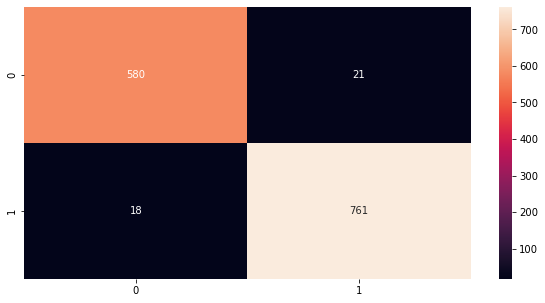

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize = (10,5))
cm = confusion_matrix(y_test, pred2)
sns.heatmap(cm, annot=True, fmt = 'g')

### Saving model

In [36]:
model.save('model.h5')

In [37]:
new_model = tf.keras.models.load_model('model.h5')
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 242, 242, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 121, 121, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 117, 117, 48)      38448     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 58, 58, 48)        0         
_________________________________________________________________
flatten (Flatten)            (None, 161472)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               41337088  
_________________________________________________________________
dense_1 (Dense)              (None, 84)                2